In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv("dltuts6_csvsheet.csv")
df.sample(5)

,area,bedrooms,price
13,1100,2,40.0
16,1180,3,48.0
8,1310,3,50.0
19,800,1,32.0
3,1521,3,75.0


In [6]:
df.drop('price',axis='columns')

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


In [7]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns')) 
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
w=np.ones(shape=(2))

In [10]:
scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [11]:
np.dot(w,scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [12]:
a= np.array([1,2,3])
b= np.array([10,5,7])
a-b

array([-9, -3, -4])

In [14]:
np.mean(np.square(a-b))

35.333333333333336

In [34]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features = X.shape[1]
    
    w=np.ones(shape=(number_of_features)) 
    b=0
    total_samples=X.shape[0]
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        y_predicted =np.dot(w, scaled_X.T) + b #w1*area + w2*bedrooms 
        
        w_grad= -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad= -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)

w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

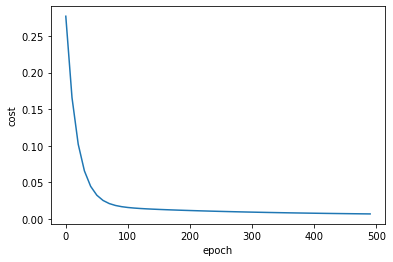

In [18]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [19]:
sx.transform([[2600,4]])

array([[0.62068966, 0.75      ]])

In [20]:
w

array([0.70712464, 0.67456527])

In [22]:
sy.inverse_transform([[0,0.5,1]])

array([[ 32. ,  99.5, 167. ]])

In [28]:
def predict(area,bedrooms,w,b):
    scaled_X=sx.transform([[area,bedrooms]])[0]
    
    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    #now the price is also scaled therefore we need to convert or invert it to a normal price
    return sy.inverse_transform([[scaled_price]])[0][0]
    


predict(2600,4,w,b)

128.45484403267596

In [29]:
predict(1000,2,w,b)

30.253094462442363

In [30]:
predict(1500,3,w,b)

69.47860785714694

In [31]:
#above was batch gradient function

In [32]:
#now its stochastic gradient function

In [38]:
import random
random.randint(0,6)

6

In [40]:
def stochastic_gradient_function(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    #numpy array with 1 row and column is equal to the no of features.In 
    #our case number_of_features = 3(area,bedroom and age)
    
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples = X.shape[0]
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        random_index=random.randint(0,total_samples-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index]
        y_predicted= np.dot(w,sample_x.T) + b
        
        w_grad= -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad= -(2/total_samples)*(sample_y-y_predicted)
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0:# at every 100th iteration the cost and epoch will be noted
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list

w_sgd,b_sgd , cost_sgd , cost_list_sgd , epoch_list_sgd = stochastic_gradient_function(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000) 
w_sgd,b_sgd,cost_sgd

(array([0.70659221, 0.6746062 ]), -0.2339822003446258, 0.0015662671835745988)

In [41]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

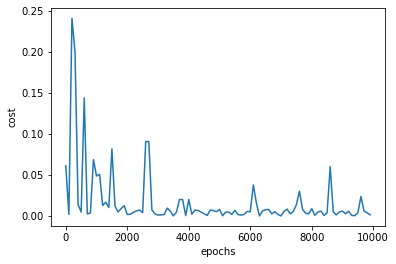

In [42]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [43]:
predict(2600,4,w_sgd,b_sgd)

127.9238345778571

In [44]:
predict(1500,3,w_sgd,b_sgd)

68.97348128482022